In [9]:
#importing all the required libraries

import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image

In [10]:
#path to the data directory
data_dir = "/content/drive/MyDrive/VR Gallery Art"
batch_size = 32
img_size = (224, 224)

datagen = ImageDataGenerator(rescale=1./255, vertical_flip = True, horizontal_flip= True)

#generating the dataset for feature extraction
feature_dataset = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'

)

Found 303 images belonging to 4 classes.


In [5]:
#load to the saved model
model = model = tf.keras.models.load_model('/content/drive/MyDrive/MyModelVGG.h5')

In [6]:
#extract features of all images from dataset
features_list = model.predict(feature_dataset, steps=len(feature_dataset))

10/10 [==============================] - 200s 19s/step


1/1 [==============================] - 1s 594ms/step
Input Image:


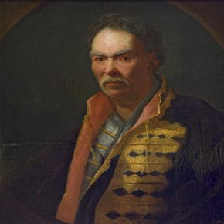

Class of the input image: Portrait

Top 5 closest images based on the input image: 


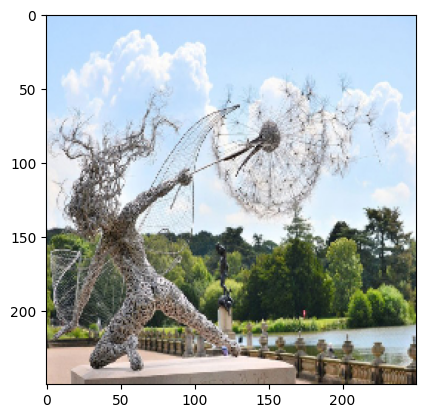

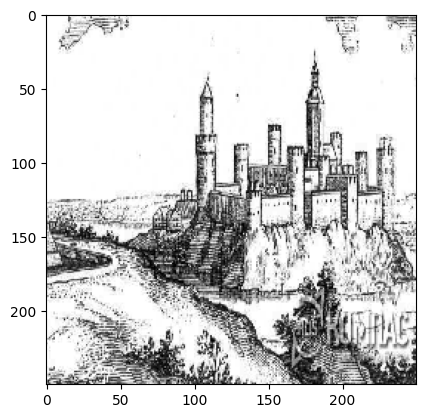

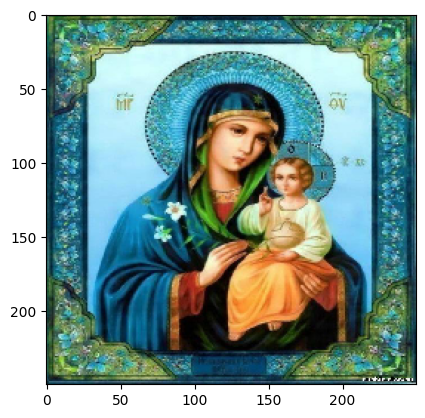

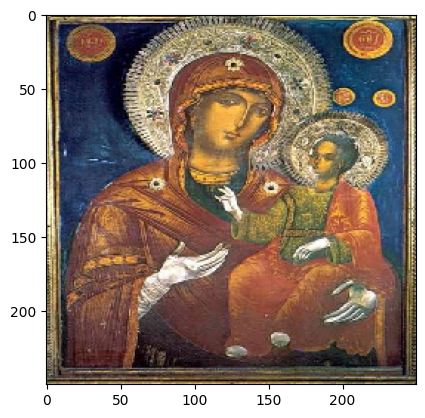

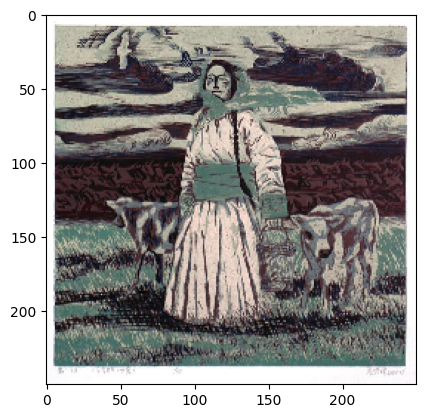

In [8]:

#Load Input Image from Directory
img = load_img('/content/drive/MyDrive/VR Gallery Art/Portrait/1391.jpg', target_size=(224, 224))

img_array = img_to_array(img) / 255.0
img_array = img_array.reshape((1,) + img_array.shape)

#Extract features of input image
features = model.predict(img_array)

print('Input Image:')
img.show()

#Predict class of input image
predicted_class = np.argmax(features)
class_labels = list(feature_dataset.class_indices.keys())
predicted_label = class_labels[predicted_class]
print('Class of the input image: ' + predicted_label)


# Calculate the cosine similarity between the input image features and all the other image features
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(features, features_list)

# Get the top 5 similar images
indices = cos_sim.argsort()[0][-6:-1]
similar_images = [feature_dataset.filenames[i] for i in indices]


print('\nTop 5 closest images based on the input image: ')
# Display the top 5 similar images
import matplotlib.pyplot as plt
for img_path in similar_images:
    img = image.load_img(data_dir + '/' + img_path, target_size=(250, 250))
    plt.imshow(img)
    plt.show()